In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.manifold import trustworthiness
from scipy.spatial.distance import pdist, squareform
import sys




import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('data/removed_outlier.csv').set_index('id')
df

loan_amnt  funded_amnt_inv  int_rate  installment  grade  sub_grade  \
id                                                                              
68407277     3600.0           3600.0     13.99       123.03   20.0       24.0   
68355089    24700.0          24700.0     11.99       820.28   20.0       21.0   
68476807    10400.0          10400.0     22.45       289.91   50.0       51.0   
68426831    11950.0          11950.0     13.44       405.18   20.0       23.0   
68476668    20000.0          20000.0      9.17       637.58   10.0       12.0   
...             ...              ...       ...          ...    ...        ...   
89905081    18000.0          18000.0      9.49       377.95   10.0       12.0   
88948836    29400.0          29400.0     13.99       683.94   20.0       23.0   
89996426    32000.0          32000.0     14.49       752.74   20.0       24.0   
90006534    16000.0          16000.0     12.79       362.34   20.0       21.0   
88224441    24000.0          24000.0     14.49       564.56   20.0       24.0   

          emp_length  home_ownership  annual_inc  verification_status  ...  \
id                                                                     ...   
68407277        10.0             3.0     55000.0                  0.0  ...   
68355089        10.0             3.0     65000.0                  0.0  ...   
68476807         3.0             3.0    104433.0                  2.0  ...   
68426831         4.0             4.0     34000.0                  2.0  ...   
68476668        10.0             3.0    180000.0                  0.0  ...   
...              ...             ...         ...                  ...  ...   
89905081         5.0             5.0    130000.0                  0.0  ...   
88948836         9.0             3.0    180792.0                  0.0  ...   
89996426         3.0             3.0    157000.0                  2.0  ...   
90006534        10.0             4.0    150000.0                  0.0  ...   
88224441         6.0             4.0    110000.0                  0.0  ...   

          num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
id                                                               
68407277                 3.0            76.9               0.0   
68355089                 2.0            97.4               7.7   
68476807                 4.0            96.6              60.0   
68426831                 0.0           100.0             100.0   
68476668                 2.0            96.3             100.0   
...                      ...             ...               ...   
89905081                 0.0           100.0              33.3   
88948836                 2.0           100.0              42.9   
89996426                 2.0           100.0               0.0   
90006534                 2.0            92.0              50.0   
88224441                 1.0            96.2              40.0   

          pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
id                                                                              
68407277                   0.0        0.0         178050.0             7746.0   
68355089                   0.0        0.0         314017.0            39475.0   
68476807                   0.0        0.0         439570.0            95768.0   
68426831                   0.0        0.0          16900.0            12798.0   
68476668                   0.0        0.0         388852.0           116762.0   
...                        ...        ...              ...                ...   
89905081                   0.0        0.0         275356.0            54349.0   
88948836                   0.0        0.0         719056.0           148305.0   
89996426                   0.0        0.0         524379.0           122872.0   
90006534                   3.0        0.0          87473.0            65797.0   
88224441                   1.0        0.0          84664.0            62426.0   

          total_bc_limit  to

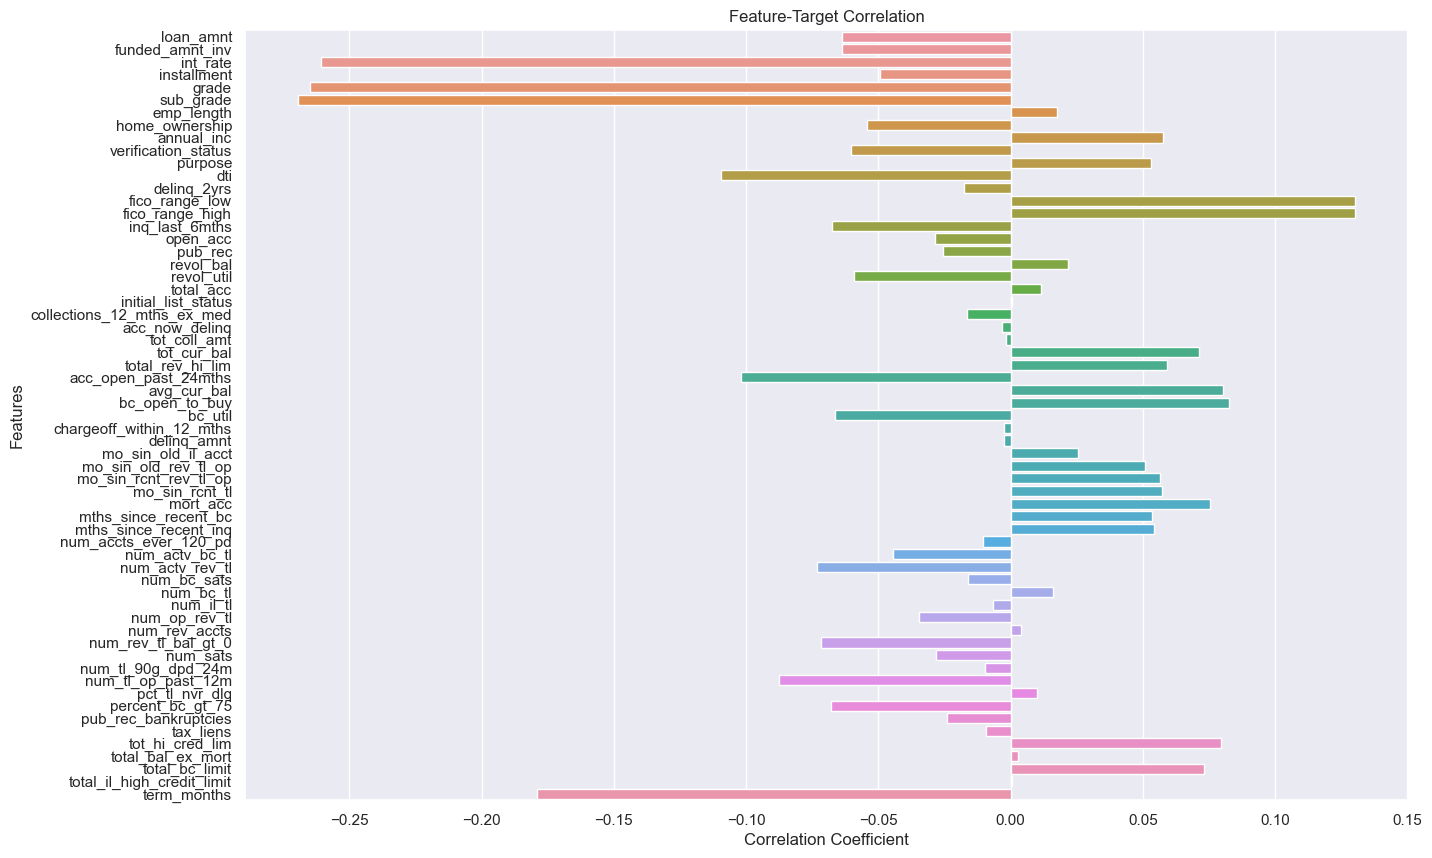

In [2]:
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

sns.set(style="darkgrid")

# Create a correlation matrix between features and target
corr_matrix = np.corrcoef(np.column_stack((X, y)), rowvar=False)

# Extract the correlation of features with the target variable
target_corr = corr_matrix[:-1, -1]

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a bar plot for feature-target correlation
sns.barplot(x=target_corr, y=X.columns)

# Set the title and labels
plt.title('Feature-Target Correlation')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Show the plot
plt.show()


In [ ]:
df_row_dict_list = []

framework = {'n_neighbors' : [5],
             'min_dist' : [0.001],
             'n_components' : [2]
    
}

for n_neighbors in framework['n_neighbors']:  
    for min_dist in framework['min_dist']:  
        for nc in framework['n_components']:
            print(f" for {n_neighbors} neighbors, {nc} n_components and min_dist = {min_dist}")
            reducer = umap.UMAP(
                n_neighbors = n_neighbors, 
                n_components = nc, 
                metric = 'euclidean', 
                min_dist = min_dist, 
                spread = 1.0, 
                random_state = 42
            )

            embedding = reducer.fit_transform(X)

            dist_matrix_original = squareform(pdist(X))
            dist_matrix_embedded = squareform(pdist(embedding))

            twness_n_neighbors = n_neighbors
            twness = trustworthiness(dist_matrix_original, dist_matrix_embedded, n_neighbors = twness_n_neighbors)

            df_row_dict_list.append({
                'n_neighbors': n_neighbors,
                'n_components':nc,
                'min_dist': min_dist,
                'twness_n_neighbors': twness_n_neighbors,
                'trustworthiness': twness})


results_df = pd.DataFrame(df_row_dict_list)

a = results_df.sort_values(['trustworthiness'], ascending=False).head(20)
a

 for 5 neighbors, 2 n_components and min_dist = 0.001
